In [1]:
import sys
import os
import numpy as np
import pandas as pd
sys.path.append(r"C:\\Users\\berger\\Documents\\Projekts\\enzyme-cascade-analysis")

from artifical_data import reaction1_synthetic_data
from monte_carlo_estimator import monte_carlo_parameter_estimation
from plotter import print_monte_carlo_info, corner_plot_monte_carlo_results, correlation_matrix_plot
from data_handler import save_results
from noise_function_libary import no_noise, add_noise_plate_reader, add_noise_processed_data,add_noise_rate
import os
import pandas as pd

In [2]:
# experimental data
EXPERIMENTAL_DATA_PATH = r"C:\\Users\\berger\\Documents\\Projekts\\enzyme-cascade-analysis\\example_reactions\\dortmund_system\\experimental_data"

# processed data
PROCESSED_DATA_PATH = r"C:\\Users\\berger\\Documents\\Projekts\\enzyme-cascade-analysis\\example_reactions\\dortmund_system\\processed_data"

# results path
RESULTS_PATH = r"C:\\Users\\berger\\Documents\\Projekts\\enzyme-cascade-analysis\\example_reactions\\dortmund_system\\results"

In [3]:
 # define model
    
parameters = ['Vmax', 'Km1', 'Km2',"Ki"]
substrates = ["HP_mM", "NADH_mM", "PD_mM"]

def michaelis_menten_inhibition(S, *parameters):
    S1, S2, S3 = S
    Vmax, Km1, Km2, Ki = parameters

    return (Vmax * S1 * S2) / ((Km1 *(1+S3/Ki) + S1) * (Km2 + S2))

In [15]:
from artifical_data import reaction2_synthetic_data


true_parameters = (2.6,111,3,90)  # Vmax, Km1, Km2
synthetic_data_r2 = reaction2_synthetic_data(true_parameters)
synthetic_data_r2.to_csv(os.path.join(PROCESSED_DATA_PATH, "synthetic_reaction2_data.csv"), index=False)

# Perform Monte Carlo parameter estimation
initial_guess = [5,100,5,85]
cal_parameters = {}

monte_carlo_results_r2 = monte_carlo_parameter_estimation(synthetic_data_r2, None, substrates, cal_parameters,
                                                            michaelis_menten_inhibition, no_noise, 
                                                            initial_guess, noise_level=0.01, num_iterations=500)

# Save results
mc_results = save_results(monte_carlo_results_r2, parameters, save_path=os.path.join(RESULTS_PATH, "artificial_reaction2_results.csv"))

In [16]:
monte_carlo_results_r1_nosiy = monte_carlo_parameter_estimation(synthetic_data_r2, None, 
                                                              substrates, cal_parameters, 
                                                              michaelis_menten_inhibition, add_noise_processed_data,
                                                              initial_guess=initial_guess, noise_level=0.01, num_iterations=500)
    
    # Save noisy results
mc_results_noisy = save_results(monte_carlo_results_r1_nosiy, parameters, save_path=os.path.join(RESULTS_PATH, "artificial_reaction1_noisy_results.csv"))

Monte Carlo Parameter Estimation Results:
Vmax: 2.603310032407779 ± 0.06278456370695339
Km1: 111.15488824899414 ± 2.8654446972999437
Km2: 3.000355783711941 ± 0.010361349574363889
Ki: 90.1099788933238 ± 1.329484303465476

Parameter Correlation Matrix:
[['' 'Vmax' 'Km1' 'Km2' 'Ki']
 ['Vmax' 1.0 0.998161096024159 0.008756524860713603 0.10902121046529185]
 ['Km1' 0.998161096024159 1.0 -0.04262729679143735 0.1386268883725094]
 ['Km2' 0.008756524860713603 -0.04262729679143735 1.0 -0.0489960226055206]
 ['Ki' 0.10902121046529185 0.1386268883725094 -0.0489960226055206 1.0]]


C:\\Users\\berger\\Documents\\Projekts\\enzyme-cascade-analysis\plotter.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"{param}: {param_means[i]} ± {param_stds[i]}")


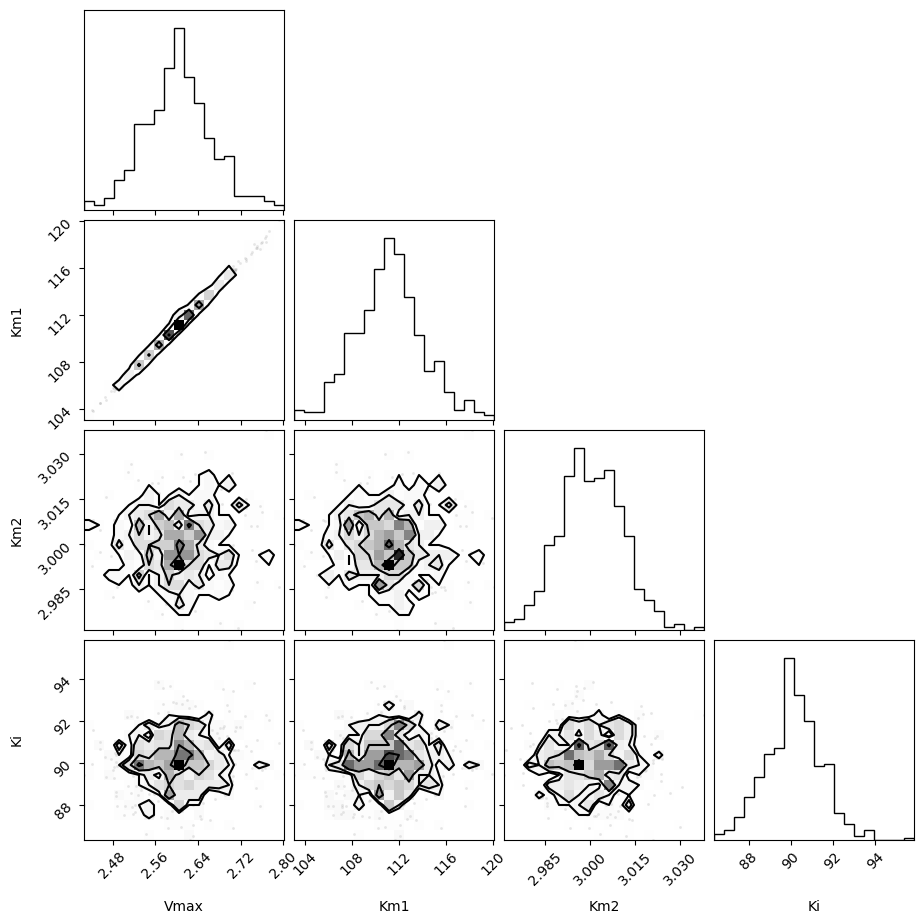

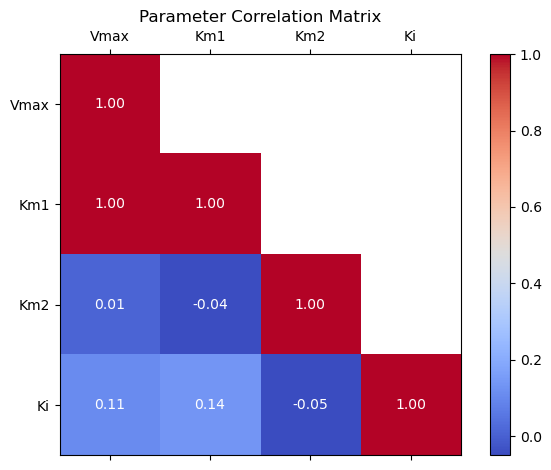

In [17]:
print_monte_carlo_info(parameters, mc_results_noisy)
corner_plot_monte_carlo_results(mc_results_noisy,parameters)
correlation_matrix_plot(mc_results_noisy,parameters)

In [ ]:
 # Perform Monte Carlo parameter estimation with experimental data

data = pd.read_csv(os.path.join(EXPERIMENTAL_DATA_PATH, "Reaction2", "r_2_HP_NADH_PD.csv"))
cal_data = pd.read_csv(os.path.join(EXPERIMENTAL_DATA_PATH, "NADH_Kalibriergerade.csv"))

cal_parameters = {
    "Vf_well": 10.0,  # mL
    "Vf_prod": 5.0,  # mL
    "c_prod": 2.15    # mg/mL
}

initial_guess = [2.6,111,3,90]
noise_level = 0.01
num_iterations = 1000


In [ ]:

mc_reaction2_noisy_plate_reader = monte_carlo_parameter_estimation(data, 
                                                            cal_data, substrates, cal_parameters,
                                                            michaelis_menten_inhibition, add_noise_plate_reader, 
                                                            initial_guess, noise_level, num_iterations)


df_reaction2_noisy_plate_reader = save_results(mc_reaction2_noisy_plate_reader, parameters, save_path=os.path.join(RESULTS_PATH, "experimental_reaction2_noisy_plate_reader_results.csv"))

C:\\Users\\berger\\Documents\\Projekts\\enzyme-cascade-analysis\plotter.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"{param}: {param_means[i]} ± {param_stds[i]}")


Monte Carlo Parameter Estimation Results:
Vmax: 173944.53122464262 ± 941546.9596685003
Km1: 109.70317328557184 ± 8.094015511791588
Km2: 176822.2946663748 ± 950041.8074761751
Ki: 141.52155027856952 ± 7.70891447172785

Parameter Correlation Matrix:
[['' 'Vmax' 'Km1' 'Km2' 'Ki']
 ['Vmax' 1.0 0.12952318125564058 0.9996228488180566 0.005270482615739847]
 ['Km1' 0.12952318125564058 1.0 0.12487470579010085 0.7786443603980486]
 ['Km2' 0.9996228488180566 0.12487470579010085 1.0 0.0023641410705377407]
 ['Ki' 0.005270482615739847 0.7786443603980486 0.0023641410705377407 1.0]]


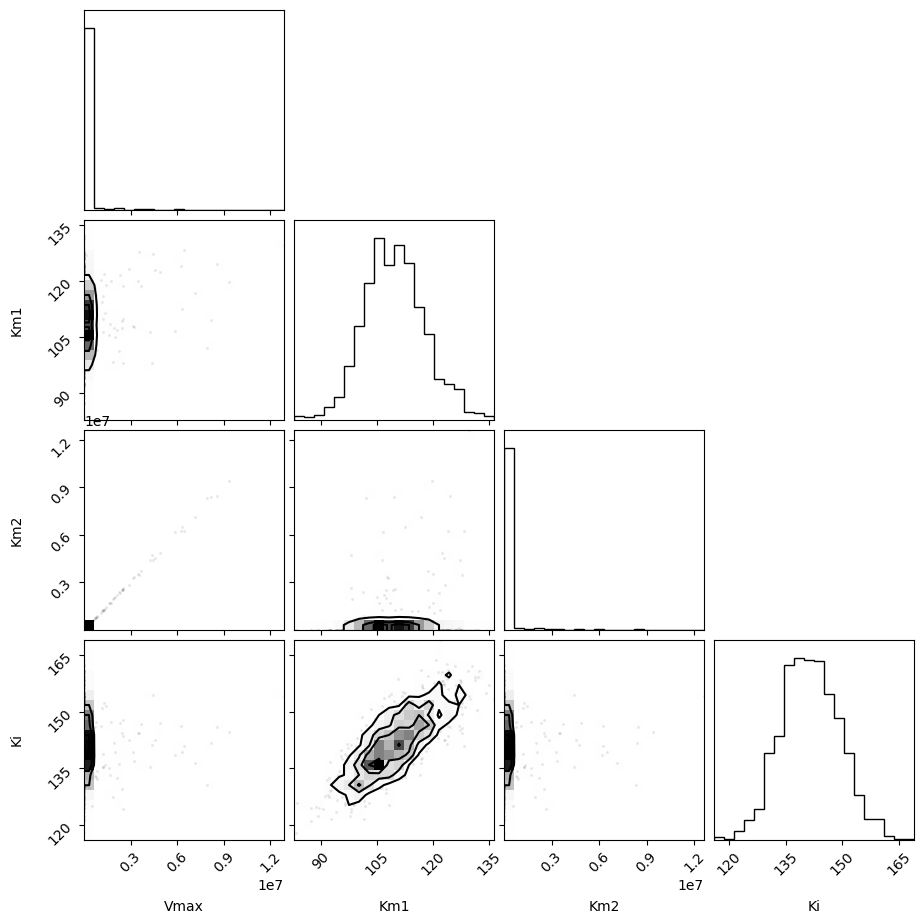

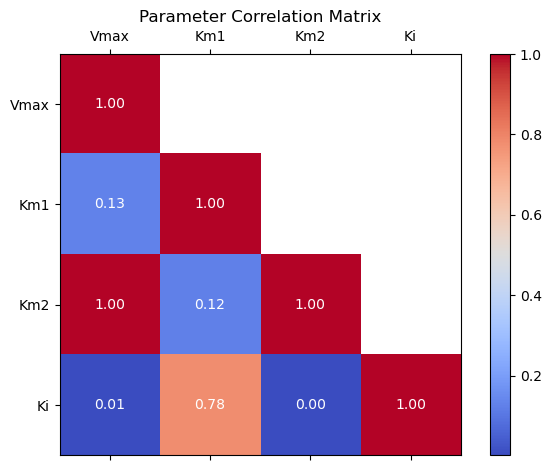

In [12]:
print_monte_carlo_info(parameters, df_reaction2_noisy_plate_reader)
corner_plot_monte_carlo_results(df_reaction2_noisy_plate_reader,parameters)
correlation_matrix_plot(df_reaction2_noisy_plate_reader,parameters)

In [13]:
# Perform Monte Carlo parameter estimation with experimental data


mc_reaction1_noisy_rates = monte_carlo_parameter_estimation(data,
                                                            cal_data, substrates, cal_parameters,
                                                            michaelis_menten_inhibition, add_noise_rate,
                                                            initial_guess, noise_level, num_iterations)


df_reaction1_noisy_rates = save_results(mc_reaction1_noisy_rates, parameters, save_path=os.path.join(RESULTS_PATH, "experimental_reaction1_noisy_plate_reader_results.csv"))

Monte Carlo Parameter Estimation Results:
Vmax: 1082804.7928733737 ± 3316449.323870122
Km1: 111.17612416632782 ± 9.313415453181992
Km2: 1114412.5236182874 ± 3414683.154183203
Ki: 142.95659285274704 ± 10.971114443195376

Parameter Correlation Matrix:
[['' 'Vmax' 'Km1' 'Km2' 'Ki']
 ['Vmax' 1.0 0.0742816544782876 0.99970353691943 0.0026491115280843865]
 ['Km1' 0.0742816544782876 1.0 0.0670891234432644 0.7139526063309142]
 ['Km2' 0.99970353691943 0.0670891234432644 1.0 -0.0005361492589485309]
 ['Ki' 0.0026491115280843865 0.7139526063309142 -0.0005361492589485309
  1.0]]


C:\\Users\\berger\\Documents\\Projekts\\enzyme-cascade-analysis\plotter.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"{param}: {param_means[i]} ± {param_stds[i]}")


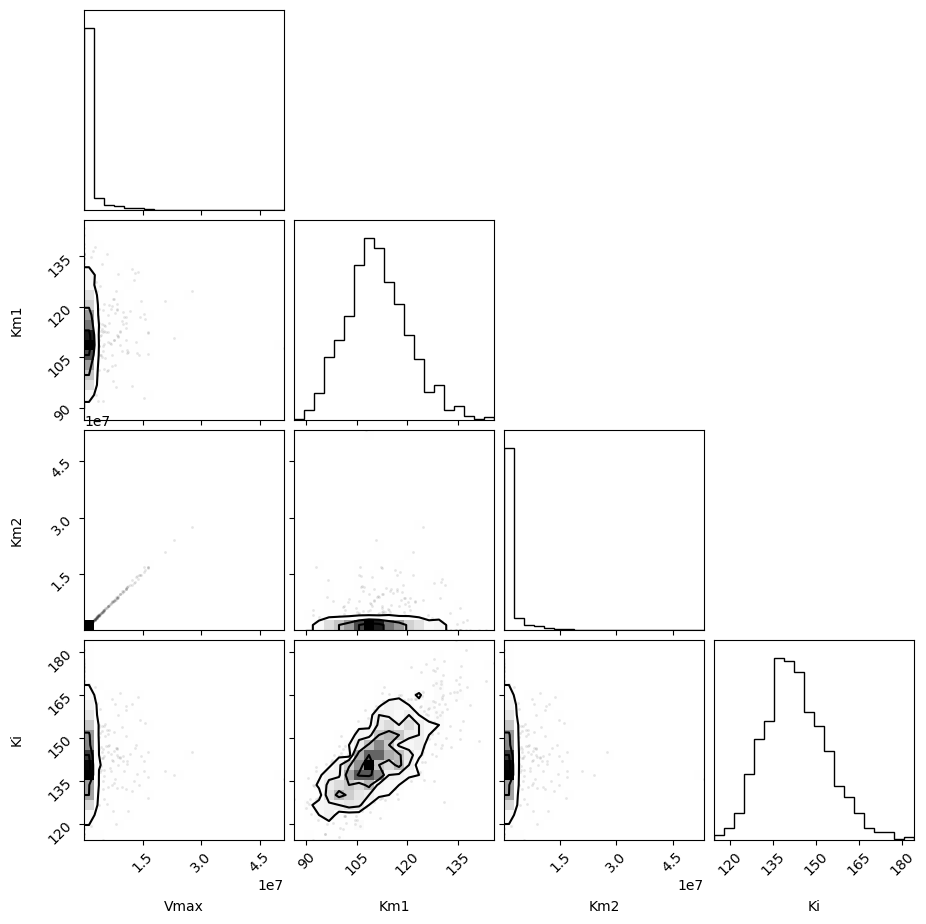

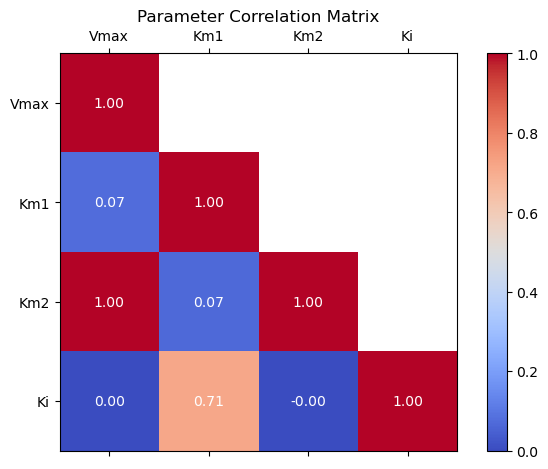

In [ ]:
print_monte_carlo_info(parameters, df_reaction1_noisy_rates)
corner_plot_monte_carlo_results(df_reaction1_noisy_rates,parameters)
correlation_matrix_plot(df_reaction1_noisy_rates,parameters)